<a href="https://colab.research.google.com/github/silacahyadewiii/Penerapan-Algoritma-Deep-Learning-dengan-Jaringan-Syaraf-Tiruan-ANN-untuk-Prediksi-AIDS/blob/main/Apps/Prediction_AIDS_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sila Cahya Dewi (22.11.5264)**

# **Load Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
pip install scikit-learn xgboost lightgbm

In [ ]:
pd.set_option("display.max_columns", None)

# **EDA**

# **Load Dataset**

In [ ]:
aids_df = pd.read_csv('/content/AIDS_Classification.csv')
aids_df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,0,0,0,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,895,0,0,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,707,0,1,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,1399,0,1,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,1352,0,1,1,3,0,0,0,504,353,870,782,0


In [ ]:
aids_df.shape

(2139, 23)

In [ ]:
aids_df.tail(5)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
2134,1091,3,21,53.2980,1,0,0,100,0,1,842,0,1,1,3,0,1,1,152,109,561,720,0
2135,395,0,17,102.9672,1,0,0,100,0,1,417,1,1,1,3,0,0,1,373,218,1759,1030,0
2136,1104,2,53,69.8544,1,1,0,90,0,1,753,1,1,1,3,0,1,0,419,364,1391,1041,0
2137,465,0,14,60.0000,1,0,0,100,0,0,0,0,1,0,1,0,0,0,166,169,999,1838,1
2138,1045,3,45,77.3000,1,0,0,100,0,0,0,0,1,0,1,0,1,0,911,930,885,526,0


## **Checking the types of data**

In [ ]:
aids_df.dtypes

,0
time,int64
trt,int64
age,int64
wtkg,float64
hemo,int64
homo,int64
drugs,int64
karnof,int64
oprior,int64
z30,int64


## **Encode Target**

In [ ]:
aids_df['infected'].value_counts()

,count
infected,
0,1618
1,521


# **Pre-processing**

In [ ]:
aids_df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,0.550257,379.175783,0.288453,0.827957,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,0.497584,468.657526,0.453149,0.377506,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,142.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,739.500000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,2851.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


## **Cek Null**

In [ ]:
aids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [ ]:
aids_df.isna().sum()

,0
time,0
trt,0
age,0
wtkg,0
hemo,0
homo,0
drugs,0
karnof,0
oprior,0
z30,0


## **Counting the number of Rows**

In [ ]:
aids_df.count()

,0
time,2139
trt,2139
age,2139
wtkg,2139
hemo,2139
homo,2139
drugs,2139
karnof,2139
oprior,2139
z30,2139


## **Cek Duplicated**

In [ ]:
print(f"Jumlah data: {aids_df.shape[0]}")
print(f"Jumlah data kosong : {aids_df.isna().sum().to_dict()}")
print(f"Jumlah data duplicated : {aids_df.duplicated().sum()}")

Jumlah data: 2139
Jumlah data kosong : {'time': 0, 'trt': 0, 'age': 0, 'wtkg': 0, 'hemo': 0, 'homo': 0, 'drugs': 0, 'karnof': 0, 'oprior': 0, 'z30': 0, 'preanti': 0, 'race': 0, 'gender': 0, 'str2': 0, 'strat': 0, 'symptom': 0, 'treat': 0, 'offtrt': 0, 'cd40': 0, 'cd420': 0, 'cd80': 0, 'cd820': 0, 'infected': 0}
Jumlah data duplicated : 0


# **Detecting Outliers**

Memastikan data diantara rata-rata Normal

In [ ]:
Q1 = aids_df.quantile(0.25)
Q3 = aids_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

time        364.000
trt           2.000
age          11.000
wtkg         15.876
hemo          0.000
homo          1.000
drugs         0.000
karnof       10.000
oprior        0.000
z30           1.000
preanti     739.500
race          1.000
gender        0.000
str2          1.000
strat         2.000
symptom       0.000
treat         0.000
offtrt        1.000
cd40        159.500
cd420       191.000
cd80        553.000
cd820       515.000
infected      0.000
dtype: float64


In [ ]:
aids_df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,0,0,0,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,895,0,0,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,707,0,1,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,1399,0,1,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,1352,0,1,1,3,0,0,0,504,353,870,782,0


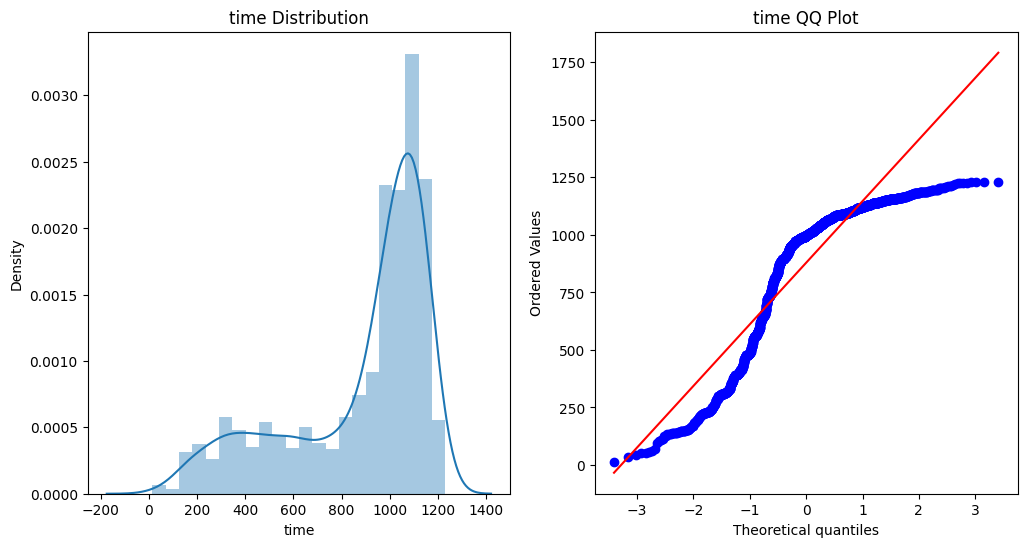

In [ ]:
# Assuming df is your DataFrame containing the column 'wtkg'
import scipy.stats as stats

plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.distplot(aids_df['time'])
plt.title('time Distribution')

plt.subplot(122)
stats.probplot(aids_df['time'], dist="norm", plot=plt)
plt.title('time QQ Plot')

plt.show()

In [ ]:
from sklearn.preprocessing import QuantileTransformer
qt_normal = QuantileTransformer(output_distribution='normal')

aids_df['time'] = qt_normal.fit_transform(aids_df[['time']])

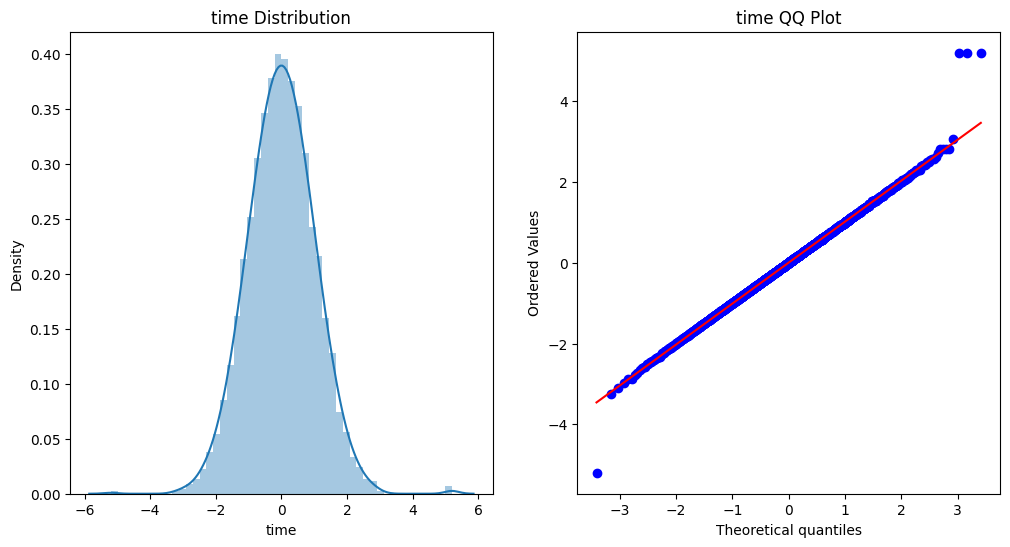

In [ ]:
# Assuming df is your DataFrame containing the column 'wtkg'
import scipy.stats as stats

plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.distplot(aids_df['time'])
plt.title('time Distribution')

plt.subplot(122)
stats.probplot(aids_df['time'], dist="norm", plot=plt)
plt.title('time QQ Plot')

plt.show()

In [ ]:
# finding the outlier
percentile25=aids_df["time"].quantile(0.25)
percentile75=aids_df["time"].quantile(0.75)
# IQR CALCULATED
iqr=percentile75 - percentile25
iqr

# checking upper and lower limit in distance variable
upper_limit=percentile75 + 1.5*iqr # UPPER LIMIT
lower_limit=percentile25 - 1.5*iqr # LOWER LIMIT
print("upper_limit",upper_limit)
print("lower_limit",lower_limit)

# capping
new_aids_df_cap = aids_df.copy()

new_aids_df_cap["time"]= np.where(
    new_aids_df_cap["time"] > upper_limit,
    upper_limit,
    np.where(
        new_aids_df_cap["time"] < lower_limit,
        lower_limit,
        new_aids_df_cap["time"]
    )

)
# Assign the modified "distance" column back to the original dataset

aids_df['time'] = new_aids_df_cap['time']

upper_limit 2.7184982003828484
lower_limit -2.709022848891048


<Axes: xlabel='time'>

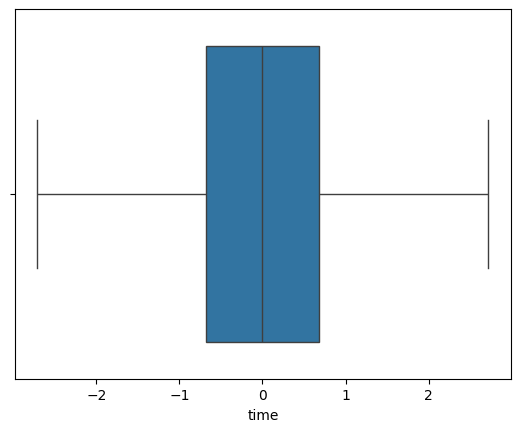

In [ ]:
sns.boxplot(x=aids_df['time'])

## **Correlation**

In [ ]:
# Convert columns with 'Confidential' to numeric, replacing invalid values with NaN
for column in aids_df.columns:
    if aids_df[column].dtype == 'object':  # Check if column is of type object (string)
        try:
            # Attempt to convert to numeric, replacing 'Confidential' with NaN
            aids_df[column] = pd.to_numeric(aids_df[column].str.replace('Confidential', 'NaN'), errors='coerce')
        except ValueError:
            # If conversion fails, leave the column as is
            pass

# Now calculate the correlation
corr = aids_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
time,1.000000,0.088172,0.029536,0.014855,-0.000291,0.064035,-0.043559,0.096077,-0.011817,0.065983,0.055578,-0.075195,0.060217,0.064879,0.077108,-0.104959,0.133659,-0.487415,0.168877,0.314505,0.005343,0.054230,-0.543794
trt,0.088172,1.000000,-0.001931,-0.031685,0.012329,0.025035,0.005712,-0.014573,-0.026805,-0.001656,0.006710,0.017080,0.022691,-0.003003,-0.003508,-0.000765,0.775990,-0.043239,-0.012770,0.064448,-0.015665,-0.004595,-0.084360
age,0.029536,-0.001931,1.000000,0.132858,-0.231257,0.158917,0.077446,-0.100041,0.056161,0.061178,0.113220,-0.097678,0.048705,0.068230,0.089884,0.032814,0.001499,-0.057695,-0.040302,-0.044294,0.046874,0.037458,0.070384
wtkg,0.014855,-0.031685,0.132858,1.000000,-0.075791,0.155909,0.002343,0.034271,0.009607,-0.073841,-0.079292,-0.081452,0.240013,-0.078885,-0.080458,0.003942,-0.040638,-0.003159,0.036401,0.020980,0.090075,0.085447,0.016205
hemo,-0.000291,0.012329,-0.231257,-0.075791,1.000000,-0.391307,-0.092957,0.068403,0.034978,0.111554,0.113892,-0.070333,0.115867,0.124983,0.141674,-0.076296,0.010786,0.005949,-0.022533,-0.065838,-0.037273,-0.058392,-0.011154
homo,0.064035,0.025035,0.158917,0.155909,-0.391307,1.000000,-0.206876,-0.042072,0.019743,-0.049760,0.014132,-0.307108,0.607820,-0.036700,-0.022608,0.118575,0.024407,-0.045151,0.000511,0.019915,0.086028,0.082284,0.054279
drugs,-0.043559,0.005712,0.077446,0.002343,-0.092957,-0.206876,1.000000,-0.084558,-0.029968,0.014961,-0.029981,0.082311,-0.141748,0.001106,-0.011319,0.027052,0.022055,0.098031,-0.003360,0.013109,0.014900,0.025728,-0.049794
karnof,0.096077,-0.014573,-0.100041,0.034271,0.068403,-0.042072,-0.084558,1.000000,-0.057291,-0.074947,-0.023189,0.026155,-0.011695,-0.085975,-0.055172,-0.107940,0.001379,-0.103251,0.077730,0.098463,-0.008567,-0.003981,-0.102944
oprior,-0.011817,-0.026805,0.056161,0.009607,0.034978,0.019743,-0.029968,-0.057291,1.000000,-0.037580,0.067082,-0.003923,0.042976,0.126040,0.134629,0.024199,-0.031801,0.019561,-0.059199,-0.109643,-0.019247,-0.036577,0.041251
z30,0.065983,-0.001656,0.061178,-0.073841,0.111554,-0.049760,0.014961,-0.074947,-0.037580,1.000000,0.655054,-0.073658,-0.036119,0.903417,0.848624,0.020883,0.003776,-0.029318,-0.121282,-0.200149,0.029346,0.018454,0.125488


# **Balancing**

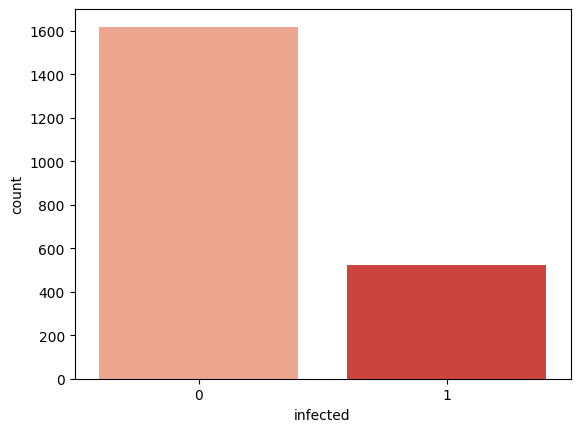

In [ ]:
aids_df['infected'].value_counts()
sns.countplot(x="infected",data=aids_df, palette="Reds")
plt.show()


# **Oversampling**

## **RandomOverSampler**

In [ ]:
X = aids_df.drop('infected', axis=1)
y = aids_df['infected']

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Apply oversampling using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)


In [ ]:
# Create a DataFrame for the oversampled data
newaids_df = pd.DataFrame(X_oversampled, columns=X.columns)
newaids_df['infected'] = y_oversampled

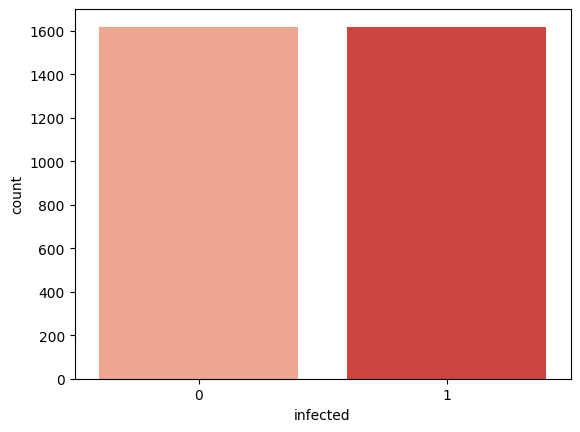

In [ ]:
#check credit.policy
sns.countplot(x="infected",data=newaids_df, palette="Reds")
plt.show()

## **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Periksa distribusi setelah SMOTE
from collections import Counter
print("Distribusi setelah SMOTE:", Counter(y_train_balanced))


Distribusi setelah SMOTE: Counter({0: 1291, 1: 1291})


In [ ]:
from sklearn import preprocessing
pre_process = preprocessing.MinMaxScaler().fit(X_oversampled)
x_transform = pre_process.fit_transform(X_oversampled)

# **Train-Test-Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y_oversampled, test_size = .10, random_state = 101)

In [ ]:
from sklearn.model_selection import train_test_split

X = aids_df.drop(columns=['infected'])
y = aids_df['infected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

print(f"Data train: {X_train.shape[0]}")
print(f"Data test: {X_test.shape[0]}")


Data train: 1711
Data test: 428


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing
import pandas as pd

# Assuming pre_process is already defined and fitted to X_oversampled

X_oversampled_scaled = pre_process.transform(X_oversampled)

iso = IsolationForest(random_state=42, contamination=0.05)
outliers = iso.fit_predict(X_oversampled_scaled)

# Filter data
X_train_clean = X_oversampled[outliers == 1] # Use the oversampled X
y_train_clean = y_oversampled[outliers == 1] # Use the oversampled y
print(f"Data train clean: {X_train_clean.shape[0]}")

Data train clean: 3075


### **Future Important**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_clean, y_train_clean) # use the cleaned oversampled data

feature_importance = pd.DataFrame({
    'Feature': X_train_clean.columns, # use the cleaned oversampled data
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

    Feature  Importance
0      time    0.435270
19    cd420    0.121461
18     cd40    0.065189
3      wtkg    0.050849
20     cd80    0.050512
21    cd820    0.046708
10  preanti    0.044310
2       age    0.043525
17   offtrt    0.026162
1       trt    0.019145
7    karnof    0.013663
14    strat    0.012204
15  symptom    0.011070
11     race    0.009977
9       z30    0.008914
5      homo    0.008542
16    treat    0.007340
12   gender    0.007288
6     drugs    0.005741
13     str2    0.005504
4      hemo    0.004935
8    oprior    0.001689


    Feature  Importance
0      time    0.307084
19    cd420    0.101536
18     cd40    0.060331
2       age    0.053180
20     cd80    0.052857
21    cd820    0.052261
3      wtkg    0.051585
10  preanti    0.037758
1       trt    0.037075
7    karnof    0.033666


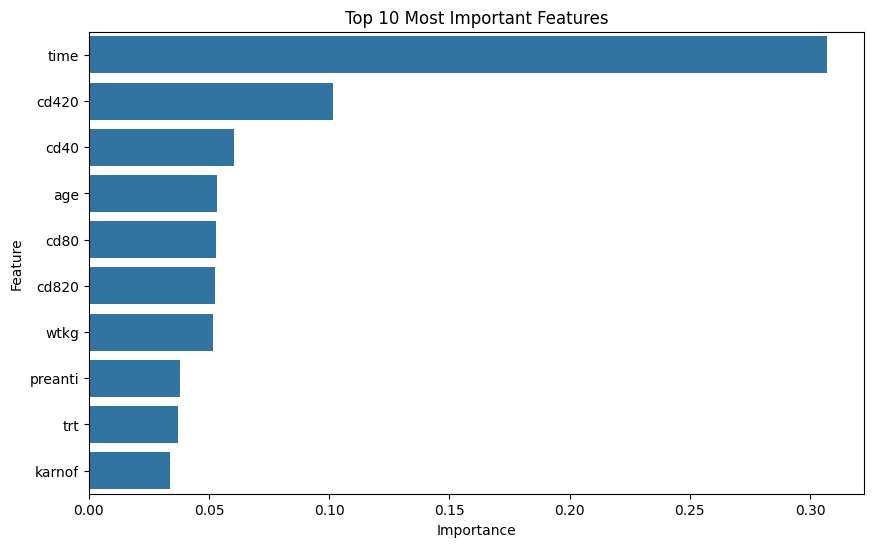

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ext = ExtraTreesClassifier(random_state=42) # Initialize the extra trees model
ext.fit(X_train_clean, y_train_clean) # Train the extra trees model with the cleaned data

# Mendapatkan feature importance
feature_importance_ext = ext.feature_importances_

# Membuat dataframe untuk menampilkan feature importance
feature_df = pd.DataFrame({'Feature': X_train_clean.columns, 'Importance': feature_importance_ext}) #Use cleaned data columns
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Menampilkan 10 fitur paling penting
print(feature_df.head(10))

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

# **MODELING DL**

Model ini adalah ANN dengan algoritma feedforward, digunakan untuk klasifikasi biner dengan pendekatan supervised learning. Model ini cocok untuk dataset tabular (berbasis numerik) seperti yang kamu gunakan. Jika dataset lebih kompleks (misalnya, gambar atau teks), arsitektur lain mungkin lebih sesuai seperti CNN atau RNN.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Membangun model ANN
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))  # Regularisasi untuk mencegah overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output untuk klasifikasi biner

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.model_selection import train_test_split

X = aids_df.drop('infected', axis=1)
y = aids_df['infected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5038 - loss: 92.6325 - val_accuracy: 0.7318 - val_loss: 26.8294
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6121 - loss: 37.7089 - val_accuracy: 0.7347 - val_loss: 15.9109
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6709 - loss: 19.6307 - val_accuracy: 0.7347 - val_loss: 9.8236
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6761 - loss: 15.4927 - val_accuracy: 0.7464 - val_loss: 4.3533
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6620 - loss: 10.1476 - val_accuracy: 0.7318 - val_loss: 2.7673
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6525 - loss: 8.1446 - val_accuracy: 0.7318 - val_loss: 1.7447
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6701 - loss: 6.7534 - val_accuracy: 0.7376 - val_loss: 0.9830
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6828 - loss: 4.4128 - val_accuracy: 0.7230 - 

In [ ]:
model.save("ann_model.h5")


In [ ]:
import pandas as pd

print(pd.Series(y_train).value_counts(normalize=True))

infected
0    0.75453
1    0.24547
Name: proportion, dtype: float64


In [ ]:
# Latih model menggunakan data yang sudah di-balance
history = model.fit(X_train_balanced, y_train_balanced,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)


Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5692 - loss: 2.1269 - val_accuracy: 0.0019 - val_loss: 0.9393
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6156 - loss: 0.6586 - val_accuracy: 0.0232 - val_loss: 1.0168
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6462 - loss: 0.6103 - val_accuracy: 0.1083 - val_loss: 0.9952
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6525 - loss: 0.6331 - val_accuracy: 0.0464 - val_loss: 0.9903
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6569 - loss: 0.6021 - val_accuracy: 0.3153 - val_loss: 0.8697
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6418 - loss: 0.6193 - val_accuracy: 0.1625 - val_loss: 0.8959
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6669 - loss: 0.6031 - val_accuracy: 0.2727 - val_loss: 0.8587
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6876 - loss: 0.5801 - val_accuracy: 0.4139 - val_loss:

In [ ]:
print("X_test shape:", X_test.shape)  # Harus (num_samples, num_features)
print("y_test shape:", y_test.shape)  # Harus (num_samples,)


X_test shape: (428, 22)
y_test shape: (428,)


In [ ]:
import numpy as np

if isinstance(X_test, (pd.DataFrame, pd.Series)):
    X_test = X_test.values
if isinstance(y_test, (pd.DataFrame, pd.Series)):
    y_test = y_test.values


In [ ]:
min_samples = min(len(X_test), len(y_test))
X_test = X_test[:min_samples]
y_test = y_test[:min_samples]

In [ ]:
X_test = X_test.astype(np.float32)

In [ ]:
print("NaN di X_test:", np.isnan(X_test).sum())
print("NaN di y_test:", np.isnan(y_test).sum())

NaN di X_test: 0
NaN di y_test: 0


In [ ]:
print("Model input shape:", model.input_shape)

Model input shape: (None, 22)


In [ ]:
model.save("balanced_model.h5")

In [ ]:
from collections import Counter
print("Distribusi y_test:", Counter(y_test))


Distribusi y_test: Counter({0: 327, 1: 101})


In [ ]:
# Ubah threshold
threshold = 0.3
y_pred = (model.predict(X_test) > threshold).astype(int)

# Evaluasi ulang
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
[[  0 327]
 [  0 101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       327
           1       0.24      1.00      0.38       101

    accuracy                           0.24       428
   macro avg       0.12      0.50      0.19       428
weighted avg       0.06      0.24      0.09       428



In [ ]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities
y_pred_prob = model.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
ROC-AUC Score: 0.6200


In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Untuk klasifikasi biner
              metrics=['accuracy'])


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Buat model (jika belum)
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer untuk klasifikasi biner

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Latih model
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2)


Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5778 - loss: 73.4587 - val_accuracy: 0.7289 - val_loss: 12.0696
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6162 - loss: 36.1708 - val_accuracy: 0.7172 - val_loss: 5.8635
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6669 - loss: 21.9821 - val_accuracy: 0.7259 - val_loss: 3.3719
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6648 - loss: 12.8188 - val_accuracy: 0.7143 - val_loss: 1.7166
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6715 - loss: 8.2032 - val_accuracy: 0.7230 - val_loss: 0.9006
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6441 - loss: 6.4362 - val_accuracy: 0.7347 - val_loss: 0.6914
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6939 - loss: 3.4577 - val_accuracy: 0.7347 - val_loss: 0.6416
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7020 - loss: 2.4166 - val_accuracy: 0.73

In [ ]:
import numpy as np

X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 64)                  │           1,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,757 (42.02 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,172 (28.02 KB)

In [ ]:
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# ... your previous code ...
model.add(Dense(1, activation='sigmoid'))

# Compile the model again after adding the new layer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
# ... your remaining code ...

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7721 - loss: 0.6441
Test Loss: 0.6452
Test Accuracy: 0.7640


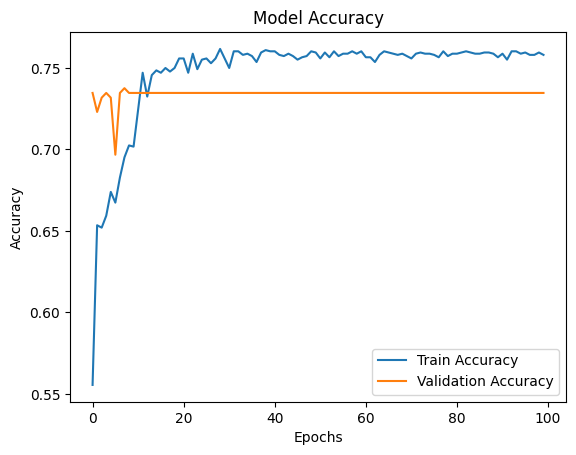

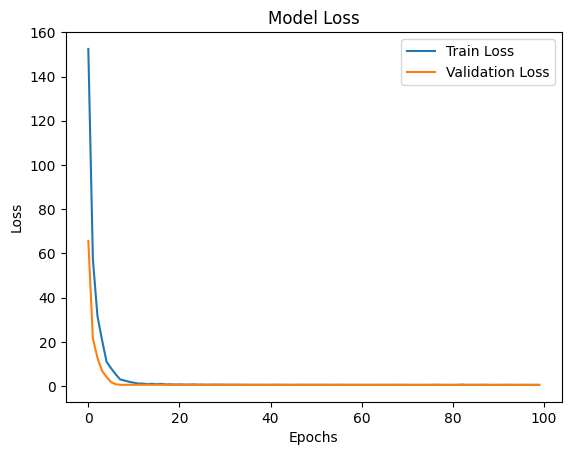

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# **HASIL UJI DATA 1**

In [ ]:
# Data baru (masukkan nilai yang sesuai dengan fitur dataset)
new_data = [[45, 110, 1.020, 2, 0, 1, 0, 0, 1, 85, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]]

# Normalisasi data baru
new_data_scaled = scaler.transform(new_data)

# Prediksi
new_pred_prob = model.predict(new_data_scaled)
new_pred_class = (new_pred_prob > 0.5).astype(int)

print("Probabilitas Prediksi:", new_pred_prob)
print("Kelas Prediksi:", "Positif" if new_pred_class[0] == 1 else "Negatif")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
Probabilitas Prediksi: [[0.36154532]]
Kelas Prediksi: Negatif


In [ ]:
# Simpan model
model.save("trained_model.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Muat model
loaded_model = load_model("trained_model.h5")


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[327   0]
 [101   0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       327
           1       0.00      0.00      0.00       101

    accuracy                           0.76       428
   macro avg       0.38      0.50      0.43       428
weighted avg       0.58      0.76      0.66       428



In [ ]:
from collections import Counter
print("Distribusi y_train:", Counter(y_train))
print("Distribusi y_test:", Counter(y_test))


Distribusi y_train: Counter({0: 1291, 1: 420})
Distribusi y_test: Counter({0: 327, 1: 101})


In [ ]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))


In [ ]:
print("Shape y_train:", y_train.shape)
print("Unique values in y_train:", np.unique(y_train))


Shape y_train: (1711,)
Unique values in y_train: [0 1]


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Hitung class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))  # Konversi ke dictionary
print("Class Weights:", class_weights)


Class Weights: {0: 0.6626646010844307, 1: 2.0369047619047618}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Perbaiki model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer untuk klasifikasi biner

# Compile ulang model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Evaluasi pada data uji
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4329 - loss: 0.7272
Test Loss: 0.7340
Test Accuracy: 0.4252


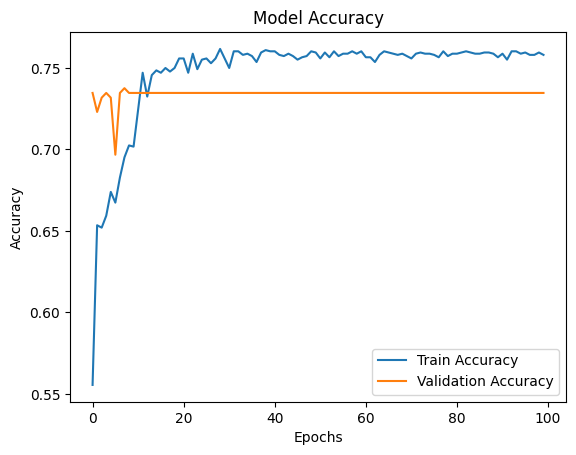

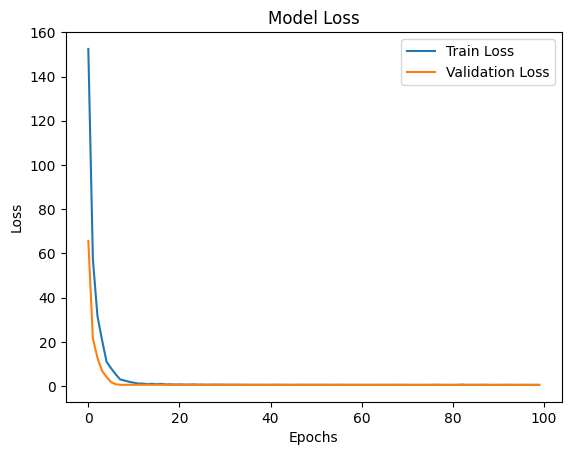

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


<Axes: >

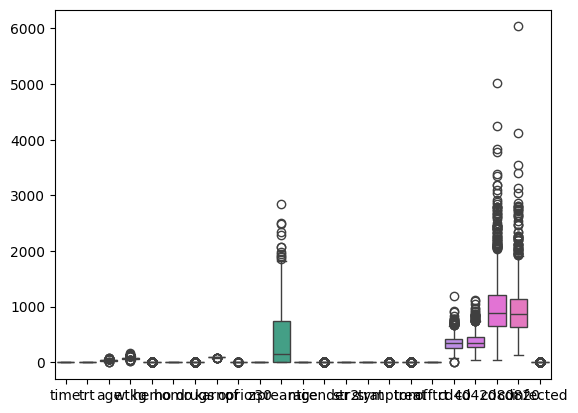

In [ ]:
import seaborn as sns
sns.boxplot(data=aids_df)

# **HASIL UJI DATA 2**

In [ ]:
# Data baru (masukkan nilai yang sesuai dengan fitur dataset)
new_data = [[45, 110, 1.020, 2, 0, 1, 0, 0, 1, 85, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]]

# Normalisasi data baru
new_data_scaled = scaler.transform(new_data)

# Prediksi
new_pred_prob = model.predict(new_data_scaled)

# Menentukan kelas berdasarkan threshold 0.3
new_pred_class = (new_pred_prob > 0.5).astype(int)

# Menampilkan hasil
print("Probabilitas Prediksi:", new_pred_prob)
print("Kelas Prediksi:", "Positif" if new_pred_class[0] == 1 else "Negatif")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Probabilitas Prediksi: [[1.8289135e-14]]
Kelas Prediksi: Negatif


# **---------------------------------------------------------------**